In [7]:
import os
import pandas as pd

# File path
data_path = "D:/stock-market-prediction/data/raw/AAPL_stock_data.csv"

# Check if file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The file does not exist: {data_path}")

# Read CSV with multi-index header (Price + Ticker)
df = pd.read_csv(data_path, header=[0,1], index_col=0)

# Flatten columns
df.columns = df.columns.get_level_values(0)

# Show basic info
print(df.head())
print(df.tail())
print(df.describe())



Price           Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.237553  24.705322  23.798602  24.694237  212818400
2015-01-05  23.554741  24.086801  23.368521  24.006992  257142000
2015-01-06  23.556959  23.816338  23.195601  23.619033  263188400
2015-01-07  23.887278  23.987038  23.654501  23.765347  160423600
2015-01-08  24.805079  24.862719  24.097882  24.215380  237458000
Price            Close        High         Low        Open    Volume
Date                                                                
2024-12-23  254.120682  254.498961  252.308869  253.622933  40858800
2024-12-24  257.037476  257.047410  254.140559  254.339671  23234700
2024-12-26  257.853760  258.928914  256.470034  257.027510  27237100
2024-12-27  254.439224  257.535238  251.920617  256.669129  42355300
2024-12-30  251.064484  252.358634  249.621015  251.094347  35557500
Price        Close         High          Low         Op

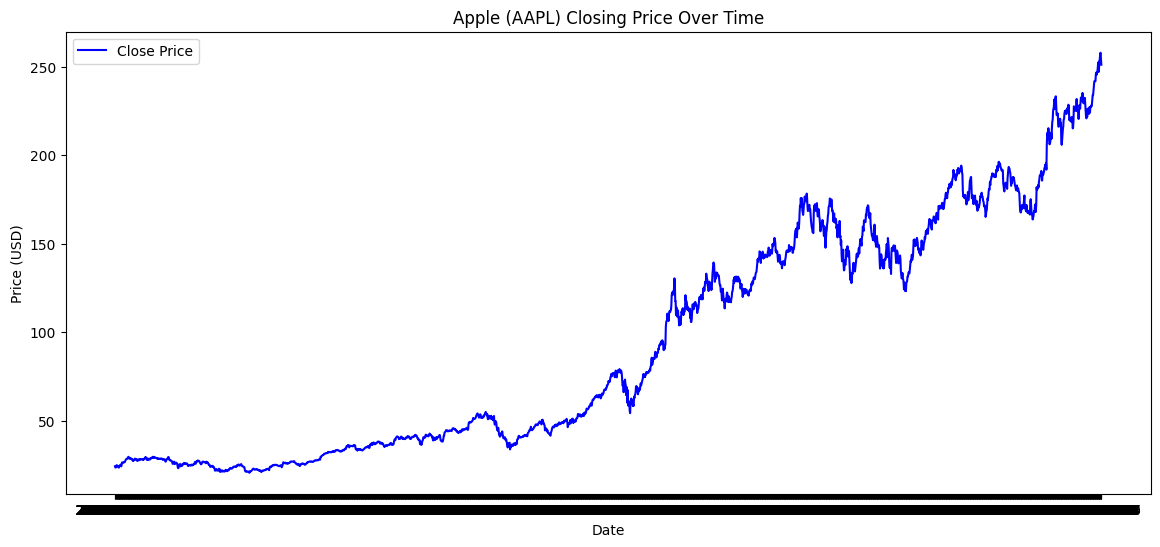

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title("Apple (AAPL) Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


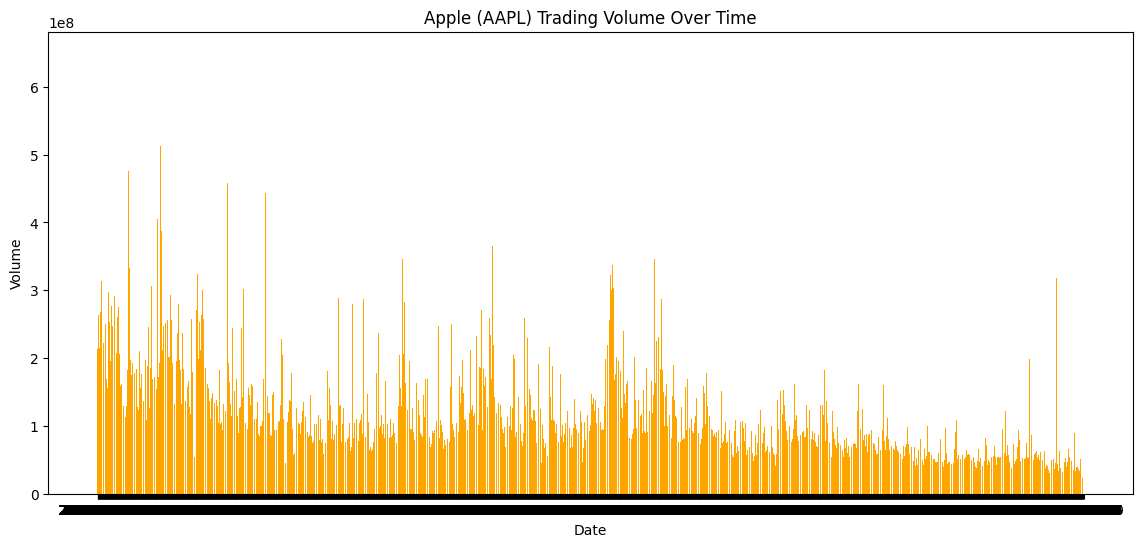

In [9]:
plt.figure(figsize=(14,6))
plt.bar(df.index, df['Volume'], color='orange')
plt.title("Apple (AAPL) Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


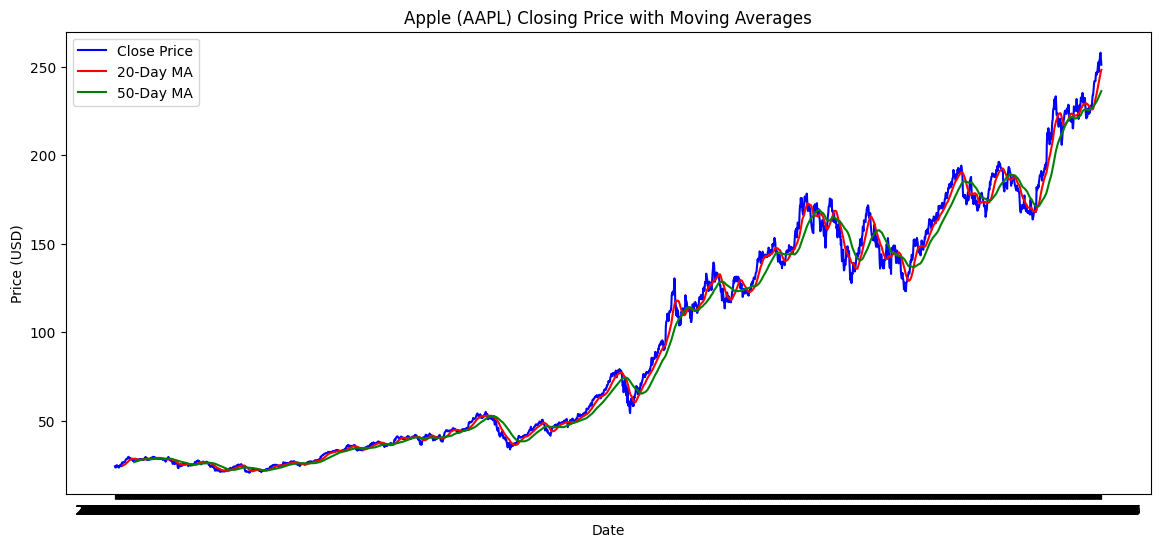

In [10]:
# 20-day and 50-day moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA20'], label='20-Day MA', color='red')
plt.plot(df['MA50'], label='50-Day MA', color='green')
plt.title("Apple (AAPL) Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


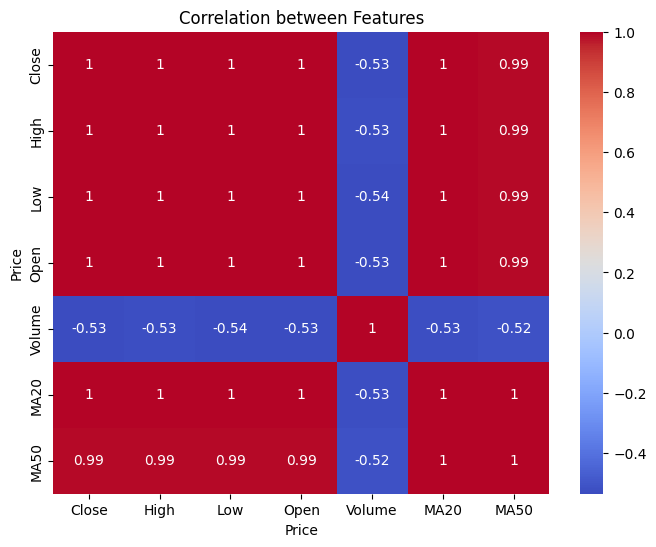

In [11]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Features")
plt.show()
